# A. STATISTIK DESKRIPTIF
  adalahhh


  

## TUGAS 1
### 1. Membaca data dari url

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/hanjes15/dataset_superstore_simple-analysis/main/Dataset_superstore_simple.csv'
c=pd.read_csv(url)
c.head()
# print(c)

,order_id,order_date,customer_id,segment,category,sub_category,sales,quantity,profit
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,Furniture,Bookcases,261.9600,2,41.9136
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,Furniture,Chairs,731.9400,3,219.5820
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,Office Supplies,Labels,14.6200,2,6.8714
3,US-2015-108966,2015-10-11,SO-20335,Consumer,Furniture,Tables,957.5775,5,-383.0310
4,US-2015-108966,2015-10-11,SO-20335,Consumer,Office Supplies,Storage,22.3680,2,2.5164


In [ ]:
import statistics as st
profit = c['profit']
profit

0        41.9136
1       219.5820
2         6.8714
3      -383.0310
4         2.5164
          ...   
9983      4.1028
9984     15.6332
9985     19.3932
9986     13.3200
9987     72.9480
Name: profit, Length: 9988, dtype: float64

### 2.Mencari Mean, Median, Modus

2.1 Mean (nilai rata-rata)

>*Mean yaitu nilai rata-rata dari data*

>*   Rumus Mean :

$$Mean= \frac{x_{1}+x_{2}+x_{3}+...+x_{n}}{n}$$

>Mean = rata-rata

>$x_{1}$ = nilai data ke-1

>$x_{n}$ = nilai data ke-n

>$n_{}$ = banyaknya data


In [ ]:
st.mean(profit)

27.105341099319183

2.2 Median (nilai tengah)

>*Median yaitu nilai tengah dari data*

>Rumus jika jumlah data ganjil : 



>$$M_{e}=\frac{X(n+1)}{2}$$

>Rumus jika jumlah data genap : 



>$$M_{e}=\frac{X_{\frac{n}{2}}+X(_{\frac{n}{2}+1})}{2}$$






In [ ]:
st.median(profit)

8.6528

2.3 Modus (Nilai Paling Sering Muncul)

In [ ]:
st.mode(profit)

0.0

### 3. Kemiringan / Skewned

In [ ]:
profit.skew()

3.095545251450256

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


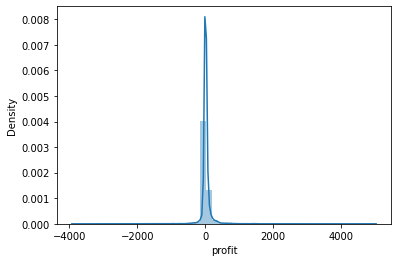

In [ ]:
plt.figure()
sns.distplot(profit)
plt.show()

# B. DISKRITISASI

adlah...

In [ ]:
#Datasets iris
import pandas as pd
import numpy as np
import statistics as st
pd.options.mode.chained_assignment=None

url_iris='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
data_iris=pd.read_csv(url_iris)
data_iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


## Tugas 2

### 1. Equal-Width

In [ ]:
data_sepal_length =  data_iris[["sepal.length"]] #data frame
data_sepal_width =  data_iris[["sepal.width"]]
data_petal_length =  data_iris[["petal.length"]]
data_petal_width =  data_iris[["petal.width"]]

Method cut digunakan untuk mencari interval menggunakan metode equal-width interval

In [ ]:
def cut(col,k):
  intervals=pd.cut(data_iris[col],k).value_counts().index.to_list() 
  return [[interval.left,interval.right] for interval in intervals]

In [31]:
def toCategory(list_interval,col):
  #get length interval
  length = len(list_interval)

  #sorting interval
  sort_interval=np.sort(list_interval,axis=0)
  #get category from interval
  categories = np.array([chr(65+i) for i in range(length)])[:,None]
  #combine into interval data
  intervals = np.hstack((sort_interval,categories))

  #operate all data
  newCol=[]
  for i, row in data_iris.iterrows():
    data=row[col]
    for interval in intervals:
      if data >= interval[0].astype(float) and data <= interval[1].astype(float):
        newCol.append(interval[2])
        break

  #return new column category
  return np.array(newCol,dtype=str) 


Mencari interval sebagai contoh disini dibagi menjadi 3 bagian

In [ ]:
interval_sepal_length =  cut("sepal.length",3) #data frame
interval_sepal_width =  cut("sepal.width",3)
interval_petal_length =  cut("petal.length",3)
interval_petal_width =  cut("petal.width",3)

print("interval_sepal.length :",interval_sepal_length)
print("interval_sepal.width :",interval_sepal_width)
print("interval_petal.length :",interval_petal_length)
print("interval_petal.width :",interval_petal_width)

interval_sepal.length : [[5.5, 6.7], [4.296, 5.5], [6.7, 7.9]]
interval_sepal.width : [[2.8, 3.6], [1.998, 2.8], [3.6, 4.4]]
interval_petal.length : [[2.967, 4.933], [0.994, 2.967], [4.933, 6.9]]
interval_petal.width : [[0.9, 1.7], [0.0976, 0.9], [1.7, 2.5]]


Tampilan hasil dari pembagian category

In [ ]:
data_sepal_length["category"] = toCategory(interval_sepal_length,"sepal.length")
data_sepal_width["category"] = toCategory(interval_sepal_width,"sepal.width")
data_petal_length["category"] = toCategory(interval_petal_length,"petal.length")
data_petal_width["category"] = toCategory(interval_petal_width,"petal.width")

display(data_sepal_length)
display(data_sepal_width)
display(data_petal_length)
display(data_petal_width)

,sepal.length,category
0,5.1,A
1,4.9,A
2,4.7,A
3,4.6,A
4,5.0,A
...,...,...
145,6.7,B
146,6.3,B
147,6.5,B
148,6.2,B


,sepal.width,category
0,3.5,B
1,3.0,B
2,3.2,B
3,3.1,B
4,3.6,B
...,...,...
145,3.0,B
146,2.5,A
147,3.0,B
148,3.4,B


,petal.length,category
0,1.4,A
1,1.4,A
2,1.3,A
3,1.5,A
4,1.4,A
...,...,...
145,5.2,C
146,5.0,C
147,5.2,C
148,5.4,C


,petal.width,category
0,0.2,A
1,0.2,A
2,0.2,A
3,0.2,A
4,0.2,A
...,...,...
145,2.3,C
146,1.9,C
147,2.0,C
148,2.3,C


### 2. Equal Frekuensi Interval
Equal frekuensi interval adalah algoritma untuk membagi rentang dari X menjadi rentang-rentang yang berisi nilai data yang kurang lebih nilainya sama

In [ ]:
data_sepal_length = data_iris[["sepal.length"]]
data_sepal_width = data_iris[["sepal.width"]]
data_sepal_length = data_iris[["petal.length"]]
data_petal_width = data_iris[["petal.width"]]

pandas menyediakan qcut untuk mencari nilai interval dari Equal-Frequency Intervals

In [ ]:
def qcut(col, k):
  intervals = pd.qcut(data_iris[col], k).value_counts().index.to_list()
  return [[interval.left, interval.right] for interval in intervals]

Mencari interval sebagai contoh disini dibagi menjadi 3 bagian

In [ ]:
interval_sepal_length =  qcut("sepal.length",3) #data frame
interval_sepal_width =  qcut("sepal.width",3)
interval_petal_length =  qcut("petal.length",3)
interval_petal_width =  qcut("petal.width",3)

print("interval_sepal.length :",interval_sepal_length)
print("interval_sepal.width :",interval_sepal_width)
print("interval_petal.length :",interval_petal_length)
print("interval_petal.width :",interval_petal_width)

interval_sepal.length : [[5.4, 6.3], [4.2989999999999995, 5.4], [6.3, 7.9]]
interval_sepal.width : [[1.999, 2.9], [2.9, 3.2], [3.2, 4.4]]
interval_petal.length : [[2.633, 4.9], [0.999, 2.633], [4.9, 6.9]]
interval_petal.width : [[0.867, 1.6], [0.099, 0.867], [1.6, 2.5]]


Menampilkan hasil pembagian category

In [ ]:
data_sepal_length["category"] = toCategory(interval_sepal_length,"sepal.length")
data_sepal_width["category"] = toCategory(interval_sepal_width,"sepal.width")
data_petal_length["category"] = toCategory(interval_petal_length,"petal.length")
data_petal_width["category"] = toCategory(interval_petal_width,"petal.width")

display(data_sepal_length)
display(data_sepal_width)
display(data_petal_length)
display(data_petal_width)

,petal.length,category
0,1.4,A
1,1.4,A
2,1.3,A
3,1.5,A
4,1.4,A
...,...,...
145,5.2,C
146,5.0,B
147,5.2,C
148,5.4,B


,sepal.width,category
0,3.5,C
1,3.0,B
2,3.2,B
3,3.1,B
4,3.6,C
...,...,...
145,3.0,B
146,2.5,A
147,3.0,B
148,3.4,C


,petal.length,category
0,1.4,A
1,1.4,A
2,1.3,A
3,1.5,A
4,1.4,A
...,...,...
145,5.2,C
146,5.0,C
147,5.2,C
148,5.4,C


,petal.width,category
0,0.2,A
1,0.2,A
2,0.2,A
3,0.2,A
4,0.2,A
...,...,...
145,2.3,C
146,1.9,C
147,2.0,C
148,2.3,C


### 3. Entropy
>*Entropy adalah*

>*   Rumus Entropy:



$$Entropy (D_{1}) = -\sum_{i=1}^{m} Pi \log_{2} Pi$$

>*   Rumus Gain:



$$Gain(E_{new}) = E_{initial} - E_{new}$$
>*   Rumus Info:



$$Info_{A}(D) = \frac{|D_{_{1}}|}{|D|} Entropy(D_{1}) + \frac{|D_{2}|}{|D|} Entropy(D_{2})$$

Membuat sample data untuk di analisis

In [ ]:
sample = data_iris[["sepal.length"]]
sample.describe()

,sepal.length
count,150.000000
mean,5.843333
std,0.828066
min,4.300000
25%,5.100000
50%,5.800000
75%,6.400000
max,7.900000


Membuat category random untuk semua data

In [ ]:
np.random.seed(0)
sample["category"] = np.where(np.random.choice(2,sample.shape[0]) < 1,"A","B")
sample

,sepal.length,category
0,5.1,A
1,4.9,B
2,4.7,B
3,4.6,A
4,5.0,B
...,...,...
145,6.7,A
146,6.3,B
147,6.5,B
148,6.2,B


Membuat fungsi GetOverollCategory (keseluruhan) yang digunakan untuk menghitung data keseluruhan yang nantinya digunakan untuk menghitung entropy

In [ ]:
def GetOverollCategory(col):
  group = sample.loc[:, :].groupby("category").count()
  a = group.loc["A", col]
  b = group.loc["B", col]
  return (a,b,a+b)

Fungsi splitter digunakan untuk membuat split antara value yang telah ditentukan lalu mengembalikan data yang telah dipisahkan

In [ ]:
def splitter(value, col):
  #get data less and greater from value
  less = sample[sample[col] <= value]
  greater = sample[sample[col] > value]

  #calculate into category for each data
  less_group = less.loc[:, :].groupby("category").count()
  greater_group = greater.loc[:, :].groupby("category").count()

  #get value based on category
  less_category_A = less_group.loc["A",col]
  less_category_B = less_group.loc["B",col]
  greater_category_A = greater_group.loc["A",col]
  greater_category_B = greater_group.loc["B",col]

  return (
      [less_category_A, less_category_B, less_category_A + less_category_B],
      [greater_category_A, greater_category_B, greater_category_A + greater_category_B]
  )

Buat fungsi entropy untuk mencari nilai entropy

In [ ]:
def entropy (d):
  r1 = (d[0] / d[2]) * np.log2(d[0] / d[2])
  r2 = (d[1] / d[2]) * np.log2(d[1] / d[2])
  return np.sum([r1, r2]) * -1

Membuat fungsi info dan gain

In [ ]:
def info(d):
  r1 = (d[0][2] / sample.shape[0]) * entropy(d[0])
  r2 = (d[1][2] / sample.shape[0]) * entropy(d[1])
  return r1 + r2

Fungsi gain untuk menghitung selisih antara entropy awal dengan yang baru

In [ ]:
def gain(Einitial, Enew):
  return Einitial - Enew

Membuat Dinitial

In [ ]:
D = GetOverollCategory("sepal.length")
entropy_d = entropy(D)
print(D)
print(entropy_d)

(68, 82, 150)
0.993707106604508


Melakukan beberapa tes split untuk menari informasi yang terbaik
### Split 1: 4.4

In [ ]:
split1 = splitter(4.4, "sepal.length")
info_split1 = info(split1)
gain(entropy_d, info_split1)

0.003488151753460178

### Split 2: 5.5

In [ ]:
split2 = splitter(5.5, "sepal.length")
info_split2 = info(split2)
gain(entropy_d, info_split2)

0.012302155146638905

### Split 3: 7.0

In [ ]:
split3 = splitter(7.0, "sepal.length")
info_split3 = info(split3)
gain(entropy_d, info_split3)

0.0005490214732508658

Split terbaik yaitu split 3 yang memberikan keuntungan informasi sebesar 0.0005490214732508658 karena yang paling rendah